In [60]:
import json, requests
import nltk
import re
from nltk.corpus import sentiwordnet as swn
import time
import timeit
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import pandas as pd
import numpy as np
import urllib.request, urllib.parse, urllib.error
import datetime

import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import zscore

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

from transformers import pipeline

import pyspark
import sys
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from operator import add
from pprint import pprint
import random
from random import sample 
from pyspark import SparkConf, SparkContext
from datetime import datetime
from operator import itemgetter
sc = pyspark.SparkContext.getOrCreate()

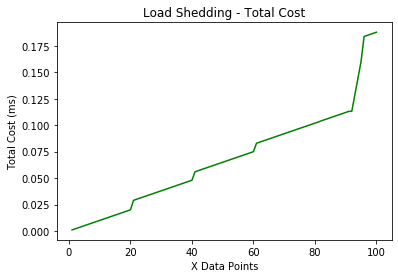

In [61]:
ip = sc.textFile("X_new.csv")

X=[0 for a in range(100)]
Y=[0 for a in range(100)]
i=1
b = 0 
while i<=100:
    s=i   
    a1=datetime.now()
    a_operator = ip.filter(lambda x: x%2 == 1)
    a2=datetime.now()
    #microseconds
    micro1=0.000001*(a2-a1).microseconds
    #seconds
    second1=(a2-a1).seconds  
    #overall time passing A
    cost_a=second1+micro1
    b += cost_a
    tolerance = 1e-4
    if cost_a > tolerance:
        throughA=1/(cost_a*s)      
        throughA2=throughA
        X[i-1] = s
        Y[i-1]= b
        i=i+1
import matplotlib.pyplot as plt
plt.figure()  
plt.plot(X,Y, 'g')   
plt.xlabel('X Data Points')
plt.ylabel("Total Cost (ms)")
plt.title('Load Shedding - Total Cost')
plt.show()

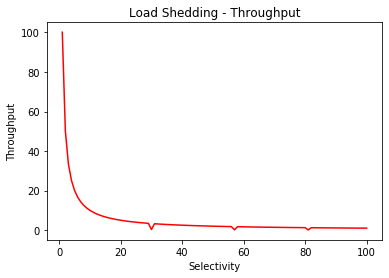

In [62]:
ip = sc.textFile("X_new.csv") \
#     .map(lambda line: line.split(",")).filter(lambda line :len(line)>3).map(lambda x : (x[0]))

# df1 = pd.DataFrame(ip, columns = ["price"])
# df1.to_csv("df1.csv", index=False)
# df1 = sc.textFile("df1.csv").map(lambda line: line.split(",")).collect()
# # print(df1)
# df1 = pd.DataFrame(df1, columns = ["price"])
# print(df1)

X1=[0 for a in range(100)]
Y1=[0 for a in range(100)]
i=1

while i<=100:
    s=float(i)   
    a1=datetime.now()
    a_operator = ip.filter(lambda x: x%2 == 1)

    a2=datetime.now()
    #microseconds
    micro1=0.000001*(a2-a1).microseconds
    #seconds
    second1=(a2-a1).seconds  
    #overall time passing A
    cost_a=second1+micro1
    tolerance = 1e-4
    if cost_a > tolerance:
        throughA=1/(cost_a*s)
                
        throughA2=throughA
        X1[i-1] = s
        Y1[i-1]=throughA2/10
        i=i+1
import matplotlib.pyplot as plt
plt.figure()  
plt.plot(X1,Y1, 'r')   
plt.xlabel('Selectivity')
plt.ylabel("Throughput")
plt.title('Load Shedding - Throughput')
plt.show()


C:\Users\mgall\Anaconda3\envs\pyspark\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000002033EE18208>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\Users\mgall\Anaconda3\envs\pyspark\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000020340FA1D08>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


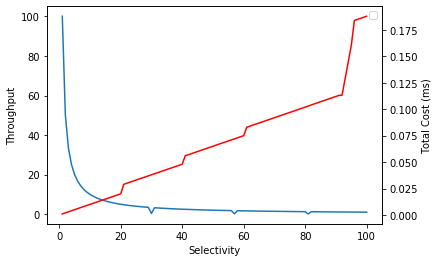

In [63]:
ax1 = plt.gca()
line1 = ax1.plot(X,Y1)
ax2 = ax1.twinx()
line2 = ax2.plot(X,Y, c = 'r')
ax1.set_xlabel("Selectivity")
ax1.set_ylabel("Throughput")
ax2.set_ylabel("Total Cost (ms)")
ax2.legend((line1,line2), ("Total Cost (ms)", "Throughput"))

[85]
0.19953399703452657
[8, 1]
0.0953187883922898
[38, 10, 41]
0.6283979382899103
[73, 9, 8, 82]
0.9108239779707689
[45, 98, 25, 20, 3]
0.8091506036856598
[43, 91, 30, 77, 50, 47]
0.8067499823483725
[21, 72, 14, 73, 8, 24, 46]
0.7807062668320875
[31, 75, 71, 20, 6, 48, 98, 30]
0.9965049777589494
[16, 84, 26, 12, 43, 89, 38, 92, 20]
0.988491138883005
[24, 97, 24, 47, 55, 45, 6, 8, 24, 48]
0.800677822495234
[48, 91, 40, 20, 3, 59, 36, 31, 25, 81, 78]
0.9859236294313608
[32, 41, 89, 43, 11, 10, 52, 72, 91, 30, 45, 8]
0.9249452799548118
[8, 92, 8, 56, 11, 45, 24, 9, 50, 16, 82, 5, 18]
0.6908575432193309
[36, 92, 60, 67, 20, 40, 18, 6, 50, 31, 73, 11, 89, 25]
0.9350319242291283
[10, 84, 27, 92, 82, 87, 72, 32, 91, 6, 10, 94, 69, 34, 5]
0.8773564922685871
[11, 52, 5, 82, 67, 78, 87, 34, 12, 9, 3, 1, 41, 18, 71, 97]
0.8843465367506884
[27, 25, 48, 20, 55, 12, 71, 89, 34, 14, 32, 10, 11, 57, 36, 9, 92]
0.7999302241549024
[40, 6, 10, 44, 87, 47, 71, 59, 11, 10, 5, 8, 21, 11, 50, 3, 89, 34]
0.7

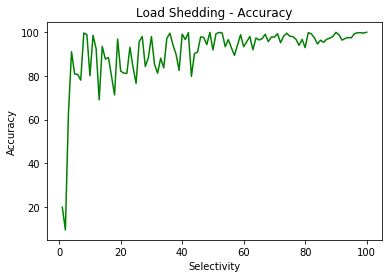

In [64]:

# Generate Uniform Integer Array of n values
from random import sample
n = 100
s = np.random.randint(100, size = (n, ))
average_array = np.average(s)
# s_1 = sample(pd.Series(s).to_list(),3)
X2=[0 for a in range(100)]
Y2=[0 for a in range(100)]
i = 1
t = 1
u = 1

while i<=100:
    u=float(i) 
    s_1 = sample(pd.Series(s).to_list(),t)
    print(s_1)
    average1 = np.average(s_1)
    accuracy_100 = (average1-average_array)/average_array
    accuracy1 = abs(accuracy_100)
    print(1-accuracy1)
    X2[i-1] = u
    Y2[i-1]=(1-accuracy1) * 100
    t=t+1
    i=i+1
plt.figure()  
plt.plot(X2,Y2, 'g')   
plt.ylabel('Accuracy')
plt.xlabel('Selectivity')
plt.title('Load Shedding - Accuracy')
#plt.axis([0, 1, 0, 1])
plt.show()

C:\Users\mgall\Anaconda3\envs\pyspark\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000020342024488>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\Users\mgall\Anaconda3\envs\pyspark\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000002034209EC08>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


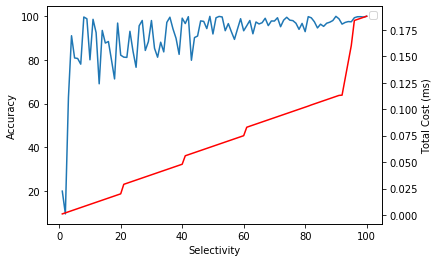

In [65]:
ax1 = plt.gca()
line1 = ax1.plot(X,Y2)
ax2 = ax1.twinx()
line2 = ax2.plot(X,Y, c = 'r')
ax1.set_xlabel("Selectivity")
ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Total Cost (ms)")
ax2.legend((line1,line2), ("Total Cost (ms)", "Accuracy"))